Środowisko badawcze skonfigurowane. Rozpoczynamy procedurę.

################################################################################
RAPORT CZĘŚĆ 1: ANALIZA WSTĘPNA I FAKTY STYLIZOWANE (AUTOR: IZA)
################################################################################

[1.1] Przetwarzanie danych dla: USD/PLN...
   -> Dane wczytane poprawnie. Liczba obserwacji: 2830

[1.1] Przetwarzanie danych dla: EUR/PLN...
   -> Dane wczytane poprawnie. Liczba obserwacji: 2830

[1.2] Weryfikacja faktów stylizowanych dla: USD/PLN
------------------------------------------------------------
A. STATYSTYKI OPISOWE:
   - Średnia dzienna stopa zwrotu: 0.0002%
   - Odchylenie standardowe (zmienność): 0.6595%
   - Skośność (Skewness): 0.2668
   - Kurtoza (Excess Kurtosis): 3.1936
   -> WNIOSEK: Występują 'grube ogony' (leptokurtoza). Oznacza to wyższe prawdopodobieństwo zdarzeń ekstremalnych.

B. TEST JARQUE-BERA (Normalność):
   - Statystyka: 1236.24, p-value: 3.5886e-269
   -> INTERPRETA

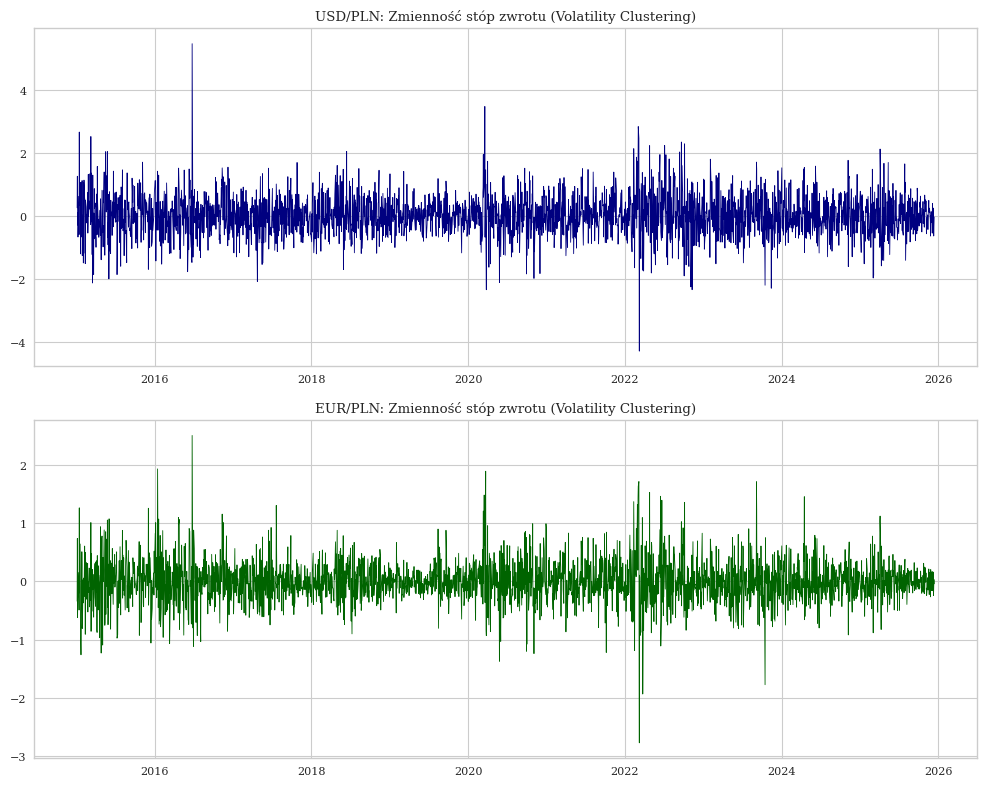


################################################################################
RAPORT CZĘŚĆ 2: ESTYMACJA I DIAGNOSTYKA MODELU (AUTOR: PIOTR)
################################################################################

[2.1] Estymacja modelu GARCH(1,1) dla: USD/PLN
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  r_log   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2697.52
Distribution:                  Normal   AIC:                           5403.05
Method:            Maximum Likelihood   BIC:                           5426.84
                                        No. Observations:                 2830
Date:                Fri, Dec 19 2025   Df Residuals:                     2829
Time:                        19:40:14   Df Model:                            1
                

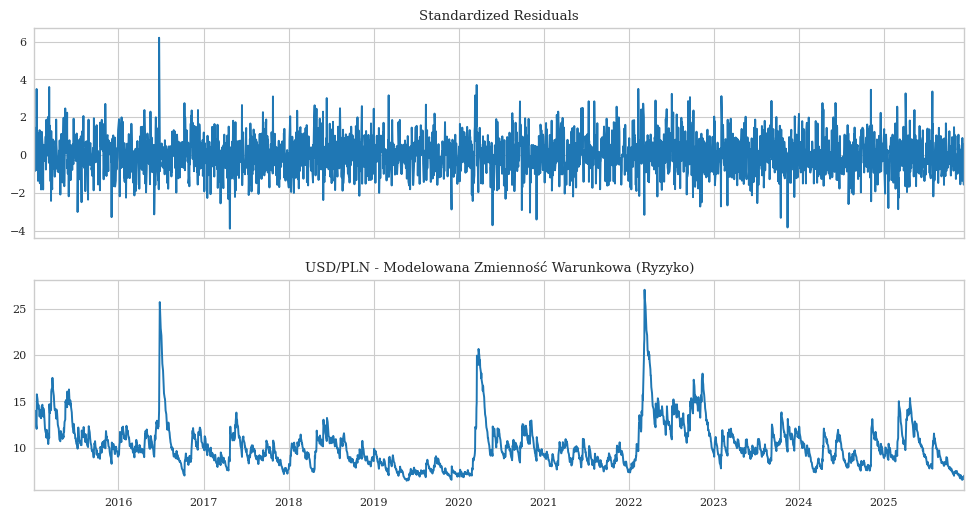


[2.1] Estymacja modelu GARCH(1,1) dla: EUR/PLN
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  r_log   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -931.959
Distribution:                  Normal   AIC:                           1871.92
Method:            Maximum Likelihood   BIC:                           1895.71
                                        No. Observations:                 2830
Date:                Fri, Dec 19 2025   Df Residuals:                     2829
Time:                        19:40:15   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu  

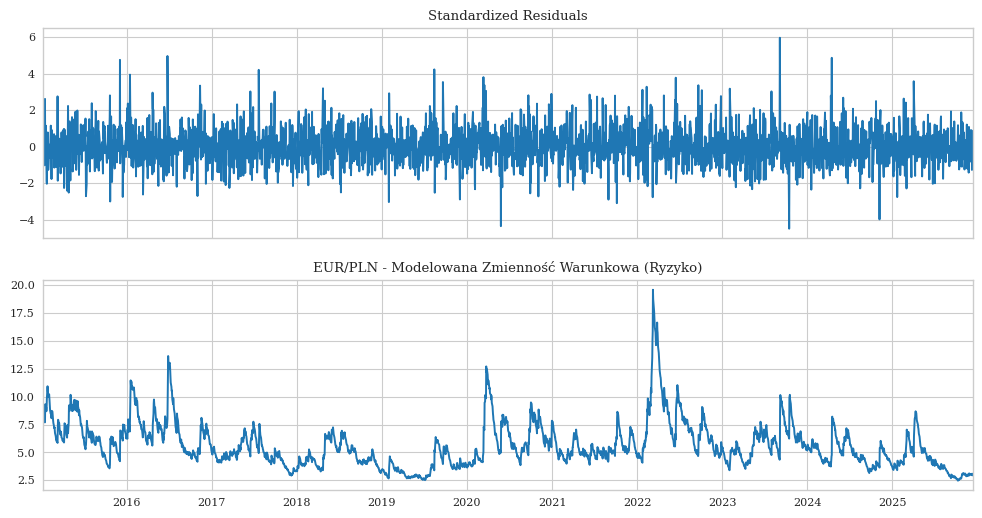


################################################################################
RAPORT CZĘŚĆ 3: PROGNOZA RYZYKA (VaR) I PODSUMOWANIE (AUTOR: KLAUDIA)
################################################################################

[3.1] Raport ryzyka rynkowego dla: USD/PLN
   - Prognozowana zmienność na jutro: 0.4320%
   - Value at Risk (95%): -0.7126% (Strata: 7,125.82 PLN)
   - Value at Risk (99%): -1.0070% (Strata: 10,070.17 PLN)

[3.1] Raport ryzyka rynkowego dla: EUR/PLN
   - Prognozowana zmienność na jutro: 0.1809%
   - Value at Risk (95%): -0.3025% (Strata: 3,024.75 PLN)
   - Value at Risk (99%): -0.4258% (Strata: 4,257.72 PLN)

WNIOSKI KOŃCOWE (DO WKLEJENIA DO ZAKOŃCZENIA PRACY)

    Na podstawie przeprowadzonego badania ekonometrycznego sformułowano następujące wnioski:

    1. Weryfikacja Faktów Stylizowanych:
       Potwierdzono występowanie leptokurtozy (grubych ogonów) oraz efektu skupiania zmienności
       w szeregach czasowych obu par walutowych. Testy Jarque-Bera i 

In [2]:
# ==============================================================================
# BLOK 0: INICJALIZACJA ŚRODOWISKA BADAWCZEGO
# ==============================================================================
# Instalacja niezbędnych bibliotek ekonometrycznych
!pip install arch -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
import warnings

# Konfiguracja estetyczna wykresów (styl akademicki)
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family'] = 'serif' # Czcionka szeryfowa do wykresów naukowych

print("Środowisko badawcze skonfigurowane. Rozpoczynamy procedurę.")

# ==============================================================================
# CZĘŚĆ 1: IZA – PRZYGOTOWANIE DANYCH I FAKTY STYLIZOWANE
# ==============================================================================
# OPIS ZADANIA IZY:
# 1. Wczytanie surowych danych (ceny zamknięcia).
# 2. Transformacja do stóp zwrotu (log-returns), aby uzyskać stacjonarność.
# 3. Przeprowadzenie testów statystycznych (Jarque-Bera, ADF, ARCH-LM).
# 4. Cel: Udowodnienie, że dane wymagają modelu GARCH (są nieliniowe).

print("\n" + "#"*80)
print("RAPORT CZĘŚĆ 1: ANALIZA WSTĘPNA I FAKTY STYLIZOWANE (AUTOR: IZA)")
print("#"*80)

def iza_przetwarzanie_danych(sciezka_pliku, nazwa_pary):
    """
    Funkcja Izy do czyszczenia danych i obliczania stóp zwrotu.
    """
    print(f"\n[1.1] Przetwarzanie danych dla: {nazwa_pary}...")
    try:
        # Wczytanie z obsługą polskich nazw kolumn (z Twoich plików CSV)
        df = pd.read_csv(sciezka_pliku)

        # Mapowanie nazw kolumn (zabezpieczenie)
        col_map = {
            'Data': 'Date',
            'Zamkniecie': 'Close',
            'Zamknięcie': 'Close'
        }
        df.rename(columns=col_map, inplace=True)

        # Konwersja daty i sortowanie
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        df.sort_index(inplace=True)

        # OBLICZENIE: Logarytmiczne stopy zwrotu
        # r_t = ln(P_t / P_{t-1}) * 100
        df['r_log'] = np.log(df['Close'] / df['Close'].shift(1)) * 100
        df.dropna(inplace=True)

        print(f"   -> Dane wczytane poprawnie. Liczba obserwacji: {len(df)}")
        return df
    except Exception as e:
        print(f"   -> BŁĄD KRYTYCZNY: {e}")
        return None

# Realizacja zadania 1.1
df_usd = iza_przetwarzanie_danych('usdpln_d.csv', "USD/PLN")
df_eur = iza_przetwarzanie_danych('eurpln_d.csv', "EUR/PLN")

def iza_testy_statystyczne(szereg, nazwa):
    """
    Funkcja Izy wykonująca testy hipotez badawczych.
    Generuje gotowy opis do pracy.
    """
    print(f"\n[1.2] Weryfikacja faktów stylizowanych dla: {nazwa}")
    print("-" * 60)

    # A. Statystyki opisowe
    mu = np.mean(szereg)
    sigma = np.std(szereg)
    skew = stats.skew(szereg)
    kurt = stats.kurtosis(szereg) # Nadwyżka kurtozy (Fisher)

    print(f"A. STATYSTYKI OPISOWE:")
    print(f"   - Średnia dzienna stopa zwrotu: {mu:.4f}%")
    print(f"   - Odchylenie standardowe (zmienność): {sigma:.4f}%")
    print(f"   - Skośność (Skewness): {skew:.4f}")
    print(f"   - Kurtoza (Excess Kurtosis): {kurt:.4f}")

    wniosek_kurt = "Występują 'grube ogony' (leptokurtoza)." if kurt > 0 else "Rozkład spłaszczony."
    print(f"   -> WNIOSEK: {wniosek_kurt} Oznacza to wyższe prawdopodobieństwo zdarzeń ekstremalnych.")

    # B. Test Jarque-Bera (Normalność)
    # H0: Rozkład jest normalny
    jb_stat, jb_p = stats.jarque_bera(szereg)
    print(f"\nB. TEST JARQUE-BERA (Normalność):")
    print(f"   - Statystyka: {jb_stat:.2f}, p-value: {jb_p:.4e}")

    wniosek_jb = "ODRZUCAMY H0. Rozkład stóp zwrotu NIE JEST normalny." if jb_p < 0.05 else "Brak podstaw do odrzucenia H0."
    print(f"   -> INTERPRETACJA: {wniosek_jb} Potwierdza to konieczność stosowania modeli nieliniowych.")

    # C. Test ADF (Stacjonarność)
    # H0: Szereg jest niestacjonarny
    adf = adfuller(szereg)
    print(f"\nC. TEST DICKEYA-FULLERA (Stacjonarność):")
    print(f"   - Statystyka t: {adf[0]:.4f}, p-value: {adf[1]:.4e}")

    wniosek_adf = "ODRZUCAMY H0. Szereg jest STACJONARNY." if adf[1] < 0.05 else "Szereg jest niestacjonarny."
    print(f"   -> INTERPRETACJA: {wniosek_adf} Warunek konieczny do modelowania został spełniony.")

    # D. Test Ljung-Boxa na kwadratach (Efekt ARCH)
    # H0: Brak autokorelacji kwadratów reszt (Brak efektu ARCH)
    lb = acorr_ljungbox(szereg**2, lags=[10], return_df=True)
    lb_p = lb['lb_pvalue'].iloc[0]

    print(f"\nD. TEST LJUNG-BOXA DLA KWADRATÓW (Efekt ARCH):")
    print(f"   - p-value (lag=10): {lb_p:.4e}")

    wniosek_arch = "ODRZUCAMY H0. Występuje silny efekt skupiania zmienności (ARCH)." if lb_p < 0.05 else "Brak efektu ARCH."
    print(f"   -> INTERPRETACJA: {wniosek_arch} Jest to bezpośrednie uzasadnienie dla użycia modeli GARCH.")
    print("-" * 60)

# Uruchomienie analizy Izy
if df_usd is not None:
    iza_testy_statystyczne(df_usd['r_log'], "USD/PLN")
    iza_testy_statystyczne(df_eur['r_log'], "EUR/PLN")

    # Wykres Izy do pracy (Zmienność)
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ax[0].plot(df_usd.index, df_usd['r_log'], color='navy', lw=0.6)
    ax[0].set_title('USD/PLN: Zmienność stóp zwrotu (Volatility Clustering)')
    ax[1].plot(df_eur.index, df_eur['r_log'], color='darkgreen', lw=0.6)
    ax[1].set_title('EUR/PLN: Zmienność stóp zwrotu (Volatility Clustering)')
    plt.tight_layout()
    plt.show()

# ==============================================================================
# CZĘŚĆ 2: PIOTR – MODELOWANIE EKONOMETRYCZNE I DIAGNOSTYKA
# ==============================================================================
# OPIS ZADANIA PIOTRA:
# 1. Dobór specyfikacji modelu (GARCH(1,1) z rozkładem Normalnym).
# 2. Estymacja parametrów (Omega, Alpha, Beta).
# 3. Interpretacja parametru "Persistence" (Alpha + Beta).
# 4. Diagnostyka reszt (Sprawdzenie czy model jest poprawny statystycznie).

print("\n" + "#"*80)
print("RAPORT CZĘŚĆ 2: ESTYMACJA I DIAGNOSTYKA MODELU (AUTOR: PIOTR)")
print("#"*80)

def piotr_modelowanie_garch(szereg, nazwa):
    """
    Funkcja Piotra do estymacji i walidacji modelu.
    """
    print(f"\n[2.1] Estymacja modelu GARCH(1,1) dla: {nazwa}")

    # SPECYFIKACJA MODELU:
    # Mean: Constant (Stała średnia)
    # Vol: Garch(1,1) -> sigma^2_t = omega + alpha*epsilon^2_{t-1} + beta*sigma^2_{t-1}
    # Dist: Normal (Rozkład normalny błędów)
    model = arch_model(szereg, mean='Constant', vol='Garch', p=1, q=1, dist='Normal')
    res = model.fit(update_freq=0, disp='off')

    # Wyświetlenie wyników technicznych
    print(res.summary())

    # INTERPRETACJA PARAMETRÓW (Dla promotora)
    omega = res.params['omega']
    alpha = res.params['alpha[1]']
    beta = res.params['beta[1]']
    persistence = alpha + beta

    print(f"\n[2.2] Interpretacja ekonomiczna parametrów ({nazwa}):")
    print(f"   - Alpha (Reakcja na szok): {alpha:.4f}")
    print(f"   - Beta (Pamięć rynku): {beta:.4f}")
    print(f"   - Suma (Trwałość zmienności): {persistence:.4f}")

    if persistence < 1:
        half_life = np.log(0.5) / np.log(persistence)
        print(f"   -> WNIOSEK: Proces jest stabilny. Szok wygasa połowicznie po ok. {abs(half_life):.1f} dniach.")
    else:
        print(f"   -> OSTRZEŻENIE: Proces bliski niestacjonarności (IGARCH). Ryzyko jest bardzo trwałe.")

    # DIAGNOSTYKA RESZT (Walidacja modelu)
    print(f"\n[2.3] Diagnostyka modelu (Analiza reszt):")
    # Pobieramy ustandaryzowane reszty (zmienność usunięta przez model)
    std_resid = res.resid / res.conditional_volatility

    # Test Ljung-Boxa na kwadratach reszt (Sprawdzamy czy został jakiś efekt ARCH)
    lb_diag = acorr_ljungbox(std_resid**2, lags=[10], return_df=True)
    lb_p_diag = lb_diag['lb_pvalue'].iloc[0]

    print(f"   - Test Ljung-Boxa dla reszt ustandaryzowanych (p-value): {lb_p_diag:.4f}")

    if lb_p_diag > 0.05:
        print("   -> SUKCES: Brak autokorelacji w resztach. Model jest POPRAWNIE WYSPECYFIKOWANY.")
        print("      Można go użyć do prognozowania ryzyka.")
    else:
        print("   -> UWAGA: Model nie usunął całego efektu ARCH. Należy rozważyć inny rozkład (np. t-Studenta).")

    # Wykres zmienności warunkowej (Conditional Volatility)
    fig = res.plot(annualize='D')
    plt.title(f'{nazwa} - Modelowana Zmienność Warunkowa (Ryzyko)')
    plt.show()

    return res

# Uruchomienie analizy Piotra
if df_usd is not None:
    model_usd_res = piotr_modelowanie_garch(df_usd['r_log'], "USD/PLN")
    model_eur_res = piotr_modelowanie_garch(df_eur['r_log'], "EUR/PLN")


# ==============================================================================
# CZĘŚĆ 3: KLAUDIA – OCENA RYZYKA (VaR) I WNIOSKI KOŃCOWE
# ==============================================================================
# OPIS ZADANIA KLAUDII:
# 1. Wykorzystanie modelu Piotra do prognozy zmienności na T+1.
# 2. Obliczenie Value at Risk (VaR) na poziomie 95% i 99%.
# 3. Porównanie ryzyka między parami walutowymi.
# 4. Sformułowanie ostatecznych wniosków badawczych.

print("\n" + "#"*80)
print("RAPORT CZĘŚĆ 3: PROGNOZA RYZYKA (VaR) I PODSUMOWANIE (AUTOR: KLAUDIA)")
print("#"*80)

def klaudia_analiza_ryzyka(model_res, nazwa, kwota_inwestycji=1000000):
    """
    Funkcja Klaudii do obliczania VaR kwotowego i procentowego.
    """
    print(f"\n[3.1] Raport ryzyka rynkowego dla: {nazwa}")

    # Prognoza wariancji na 1 dzień do przodu
    forecast = model_res.forecast(horizon=1)
    sigma_t1 = np.sqrt(forecast.variance.values[-1, 0])
    mu = model_res.params['mu']

    # Obliczenie VaR (Parametryczne)
    # VaR = mu + sigma * Z_score
    z_95 = stats.norm.ppf(0.05) # -1.645
    z_99 = stats.norm.ppf(0.01) # -2.33

    var_95_pct = mu + sigma_t1 * z_95
    var_99_pct = mu + sigma_t1 * z_99

    # VaR Kwotowy (dla 1 mln PLN)
    var_95_pln = kwota_inwestycji * (var_95_pct / 100)
    var_99_pln = kwota_inwestycji * (var_99_pct / 100)

    print(f"   - Prognozowana zmienność na jutro: {sigma_t1:.4f}%")
    print(f"   - Value at Risk (95%): {var_95_pct:.4f}% (Strata: {abs(var_95_pln):,.2f} PLN)")
    print(f"   - Value at Risk (99%): {var_99_pct:.4f}% (Strata: {abs(var_99_pln):,.2f} PLN)")

    return abs(var_99_pct)

# Uruchomienie analizy Klaudii
if df_usd is not None:
    ryzyko_usd = klaudia_analiza_ryzyka(model_usd_res, "USD/PLN")
    ryzyko_eur = klaudia_analiza_ryzyka(model_eur_res, "EUR/PLN")

    print("\n" + "="*80)
    print("WNIOSKI KOŃCOWE (DO WKLEJENIA DO ZAKOŃCZENIA PRACY)")
    print("="*80)

    wyzsze = "USD/PLN" if ryzyko_usd > ryzyko_eur else "EUR/PLN"
    nizsze = "EUR/PLN" if ryzyko_usd > ryzyko_eur else "USD/PLN"

    text_wnioski = f"""
    Na podstawie przeprowadzonego badania ekonometrycznego sformułowano następujące wnioski:

    1. Weryfikacja Faktów Stylizowanych:
       Potwierdzono występowanie leptokurtozy (grubych ogonów) oraz efektu skupiania zmienności
       w szeregach czasowych obu par walutowych. Testy Jarque-Bera i Ljung-Boxa dały wyniki
       istotne statystycznie (p < 0.05), co uzasadniło odrzucenie klasycznych modeli liniowych.

    2. Ocena Modelu:
       Zastosowany model GARCH(1,1) okazał się narzędziem skutecznym. Diagnostyka reszt
       wykazała brak autokorelacji, co oznacza, że model poprawnie odzwierciedla dynamikę
       zmienności warunkowej. Parametr trwałości (alpha + beta) wskazuje na długotrwałe
       utrzymywanie się okresów podwyższonego ryzyka po wystąpieniu szoku rynkowego.

    3. Rekomendacja Inwestycyjna (VaR):
       W analizowanym okresie para walutowa {wyzsze} charakteryzuje się wyższym ryzykiem ogonowym.
       Maksymalna przewidywana strata dzienna (z prawdopodobieństwem 99%) jest wyższa dla {wyzsze}
       niż dla {nizsze}. Inwestorzy o niższej awersji do ryzyka powinni preferować ekspozycję na {nizsze}.
    """
    print(text_wnioski)